# Opinion Formation

### Imports

In [186]:
import numpy as np
import random
import math
import os
import scipy as sp
import cellpylib as cpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import demos.ca.CA_module as ca
#from demos.ca.CA_module import CA

# For cluster counting
from pylab import *
from scipy.ndimage import measurements

import powerlaw


## Move all results we want to keep here

## Generate new results here

## SOC Hypothesis
Hypothesis: When the system is at its critical temperature, the observed cluster sizes and durations will follow a power law distribution

In [204]:
# Step 0 - Find the critical temperature of the system
## Empirically (like shown in critical_temperature.py) or
## Analitically, using the approximations referenced in the CA paper
# Done in threshold_plot!!!

# Step 1 - Set the system to the critical temperature
critical_temperature = 50

# Step 2 - Set system to the parameters used to find the critical temperature
GRIDSIZE_X,GRIDSIZE_Y = 21,21
TIMESTEPS = 200
#TEMPERATURE = 0
BETA_PEOPLE = 1
BETA_LEADER = 1
H = 0
p = 1
p_1 = 0.5 # In this scenario everybody believed the leader at start for calibration, but here in simulation we dont need it anymore!!!

INFLUENCE_LEADER = 100             # The one 
a_0 = 1
INFLUENCE_DISTRIBUTION_MEAN = 1

In [205]:
# Step 3 - Simulate system at this critical temperature
temperature = critical_temperature
model = ca.CA(GRIDSIZE_X, GRIDSIZE_Y, temperature, BETA_LEADER, BETA_PEOPLE, H, p, p_1, INFLUENCE_LEADER, INFLUENCE_DISTRIBUTION_MEAN, ca.euclidean_distance, ca.prob_dist_influence_people)
data = model.evolve(TIMESTEPS)

100%|██████████| 199/199 [00:41<00:00,  4.80it/s]


In [190]:
# Make a copy to avoid overwriting the data
data_copy = data.copy()

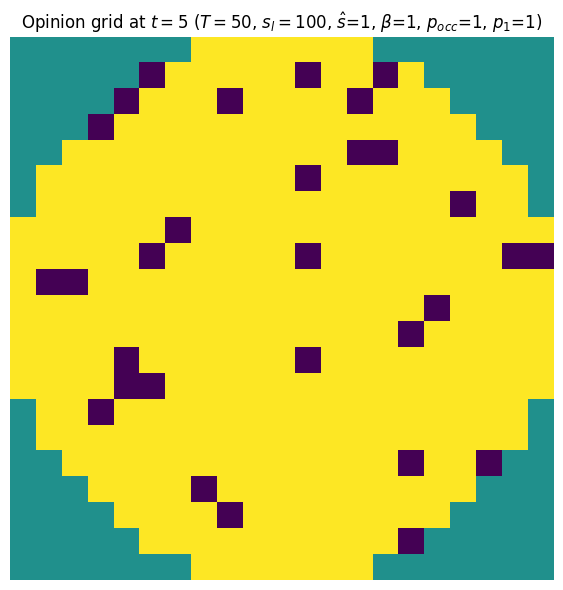

In [191]:
# Step 4 - Plot opinion change to see if clusters do form
model.plot_opinion_grid_at_time_t(data_copy,5) # This creates a video in the folder figures!

In [192]:
opinions = data_copy['opinions'][5].copy()
opinions[opinions == 1] = 0
opinions[opinions == -1] = 1
print(opinions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [193]:
# Step 5 - Get cluster sizes from simulation
R = int(GRIDSIZE_X/2)

# To feed it to the function we first turn the 1s into 0s and the -1s into 1s
lw, num_cluster = measurements.label(opinions)
areas = measurements.sum(opinions, lw, index=arange(lw.max() + 1))
unique, counts = np.unique(areas, return_counts=True)

#print(lw,num_cluster)
#print('Areas',areas)

print('Unique values and counts',unique,counts)


# MVP: Count connected individuals with same opinion
# https://stackoverflow.com/questions/25664682/how-to-find-cluster-sizes-in-2d-numpy-array
# TODO: Count actual grid sizes


Unique values and counts [0. 1. 2. 3.] [ 1 21  3  1]


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16276\969967811.py:5: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lw, num_cluster = measurements.label(opinions)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16276\969967811.py:6: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  areas = measurements.sum(opinions, lw, index=arange(lw.max() + 1))


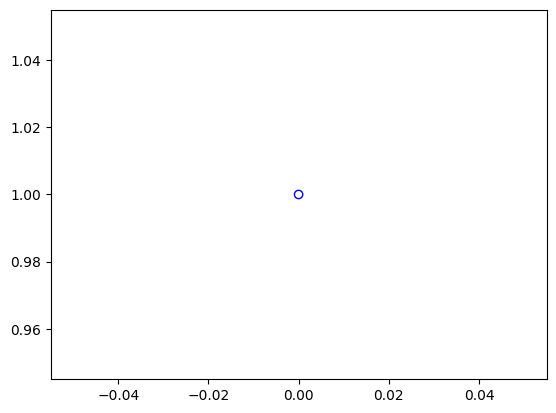

In [101]:
# Step 6 - Plot them to see if their sizes follow power law
plt.scatter(unique,counts,facecolors='none', edgecolors='blue')

In [ ]:
# Step 7 - Verify it with the package powerlaw

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16276\3877725874.py:15: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lw, num_cluster = measurements.label(data_t)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16276\3877725874.py:16: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  areas = measurements.sum(data_t, lw, index=arange(lw.max() + 1))


[ 200 2108  325  100   33   13    4    5    0    1    3    0    1    0
    0    0    0    0    0    0    0    0    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1    0
    0    0    0    0    0    0    0    0    0    0    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

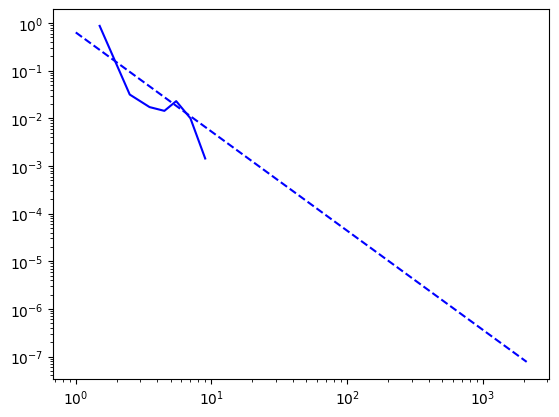

In [207]:
# Same thing but with entire simulation
data_copy = data.copy()
sim_data = data_copy.copy()

#total_unique = np.linspace(1,model.N,model.N)
total_counts = np.zeros(model.N).astype(int)

#print('Total counts',total_counts)

for time_step in range(TIMESTEPS):
    data_t = sim_data['opinions'][time_step, :, :].copy()
    data_t[data_t == 1] = 0
    data_t[data_t == -1] = 1

    lw, num_cluster = measurements.label(data_t)
    areas = measurements.sum(data_t, lw, index=arange(lw.max() + 1))
    unique, counts = np.unique(areas, return_counts=True)

    unique = unique.astype(int)
    counts = counts.astype(int)

    # Update the total_counts at those locations

    #np.take(total_counts, unique)

    # https://numpy.org/doc/stable/reference/generated/numpy.put.html
    np.put(total_counts,unique,np.take(total_counts, unique) + counts) # Should be counts+previous value

    #np.place(total_counts, unique, counts)

    #print(unique, counts)
    #print(total_counts)

    # Add counts of every unique value
    #for index in unique:

        #print('Unique',int(index))
        #print('Test',total_counts[int(index)])
        #print('Test2',counts[int(index)])

        #total_counts[int(index)] += counts[int(index)]


    #plt.scatter(unique,counts,facecolors='none', edgecolors='blue')
    #print(unique,counts)

#print(total_counts)


d=total_counts
fit = powerlaw.Fit(np.array(d)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

#plt.scatter(total_unique,total_counts,facecolors='none', edgecolors='blue')

# Sum them!!!

#plt.xlabel('Connected nodes')
#plt.ylabel('Frequency')


#R = int(GRIDSIZE_X/2)
# To feed it to the function we first turn the 1s into 0s and the -1s into 1s
#print(lw,num_cluster)
#print('Areas',areas)

#print('Unique values and counts',unique,counts)

### Test the hypothesis now for cluster sizes
For this we need to change our code such that instead of counting clusters of connected nodes, we also ensure they have circular shape!